In [1]:
R.Version()$version.string

[1] "R version 3.5.2 (2018-12-20)"

In [2]:
# install.packages("psych", repos="https://cloud.r-project.org/")
library(psych)
# install.packages("eRm", repos="https://cloud.r-project.org/") #https://rdrr.io/rforge/eRm/
library(eRm)
# install.packages("reshape2", repos="https://cloud.r-project.org/") #https://rdrr.io/rforge/eRm/
library(reshape2)



Attaching package: 'psych'

The following object is masked from 'package:car':

    logit

The following object is masked from 'package:crayon':

    %+%

Warning message:
"package 'eRm' was built under R version 3.5.3"
Attaching package: 'eRm'

The following object is masked from 'package:psych':

    sim.rasch

Warning message:
"package 'reshape2' was built under R version 3.5.3"

# Primer método

In [3]:
# train_stud_ans=read.csv("train_answers_items.csv", row.names=1)
# str(train_stud_ans)

# test_stud_ans=read.csv("test_answers_items.csv", row.names=1)
# str(test_stud_ans)

In [4]:
# diffs_train=irt.item.diff.rasch(train_stud_ans)
# train_desc=data.frame(describe(train_stud_ans))
# train_desc$IRT_difficulty=diffs_train
# #write.csv(data.frame(train_desc),"train_desc.csv")

# diffs_test=irt.item.diff.rasch(test_stud_ans)
# test_desc=data.frame(describe(test_stud_ans))
# test_desc$IRT_difficulty=diffs_test
# #write.csv(data.frame(test_desc),"test_desc.csv")

# summary(test_desc)
# str(test_desc)

# Segundo método

In [3]:
train_califs=read.csv("train_califs.csv", sep=";",row.names=1)
test_califs=read.csv("test_califs.csv", sep=";",row.names=1)

dim(train_califs)
dim(test_califs)

califs_complete=rbind(train_califs,test_califs)
head(califs_complete)
dim(califs_complete)

[1] 8910    5

[1] 7093    5

,dtset,quest_id,id_st,st_ans_calif,std_code
0,TRAIN SciEntsBank,EM_45b,EM.45b.110.1,0,110.1
1,TRAIN SciEntsBank,EM_45b,EM.45b.113.1,1,113.1
2,TRAIN SciEntsBank,EM_45b,EM.45b.114.1,1,114.1
3,TRAIN SciEntsBank,EM_45b,EM.45b.261.1,0,261.1
4,TRAIN SciEntsBank,EM_45b,EM.45b.383.1,0,383.1
5,TRAIN SciEntsBank,EM_45b,EM.45b.384.1,1,384.1


[1] 16003     5

In [6]:
# #https://seananderson.ca/2013/10/19/reshape/
# #https://www.r-bloggers.com/reshape-r-package-reshape2-melt-and-cast/

# train_califs_cast=dcast(train_califs, std_code~quest_id, value.var="st_ans_calif")
# rownames(train_califs_cast)=train_califs_cast$std_code
# train_califs_cast=train_califs_cast[,2:length(train_califs_cast)]
# head(train_califs_cast)
# ###
# test_califs_cast=dcast(test_califs, std_code~quest_id, value.var="st_ans_calif")
# rownames(test_califs_cast)=test_califs_cast$std_code
# test_califs_cast=test_califs_cast[,2:length(test_califs_cast)]
# head(test_califs_cast)
# ###
# dim(train_califs_cast)
# dim(test_califs_cast)

# train_califs_cast=train_califs_cast[rowSums(!is.na(train_califs_cast))>1,]
# train_califs_cast=train_califs_cast[,colSums(!is.na(train_califs_cast))>1]

# test_califs_cast=test_califs_cast[rowSums(!is.na(test_califs_cast))>1,]
# test_califs_cast=test_califs_cast[,colSums(!is.na(test_califs_cast))>1]

# dim(train_califs_cast)
# dim(test_califs_cast)


In [4]:
##
califs_complete_cast=dcast(califs_complete, std_code~quest_id, value.var="st_ans_calif")
rownames(califs_complete_cast)=califs_complete_cast$std_code
califs_complete_cast=califs_complete_cast[,2:length(califs_complete_cast)]

dim(califs_complete_cast)

califs_complete_cast=califs_complete_cast[rowSums(!is.na(califs_complete_cast))>1,]
califs_complete_cast=califs_complete_cast[,colSums(!is.na(califs_complete_cast))>1]

califs_complete_cast=califs_complete_cast[rowSums(!is.na(califs_complete_cast))>1,]
califs_complete_cast=califs_complete_cast[,colSums(!is.na(califs_complete_cast))>1]

dim(califs_complete_cast)
head(califs_complete_cast)

# write.csv(data.frame(califs_complete_cast),"califs_complete_cast.csv")

[1] 5887  252

[1] 565 195

,EM_16b,EM_21a,EM_21b,EM_26,EM_27b,EM_35,EM_43b,EM_45b,EM_45c,EM_46,...,WA_29,WA_30b,WA_31,WA_32b,WA_33b,WA_50b,WA_51,WA_52a,WA_52b,WA_7b
101.1,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
102.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
103.1,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
104.1,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
105.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
106.1,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
diffs_califs_complete=irt.item.diff.rasch(califs_complete_cast)
califs_complete_desc=data.frame(describe(califs_complete_cast))
califs_complete_desc$IRT_difficulty=diffs_califs_complete

# write.csv(data.frame(califs_complete_desc),"califs_complete_desc.csv")

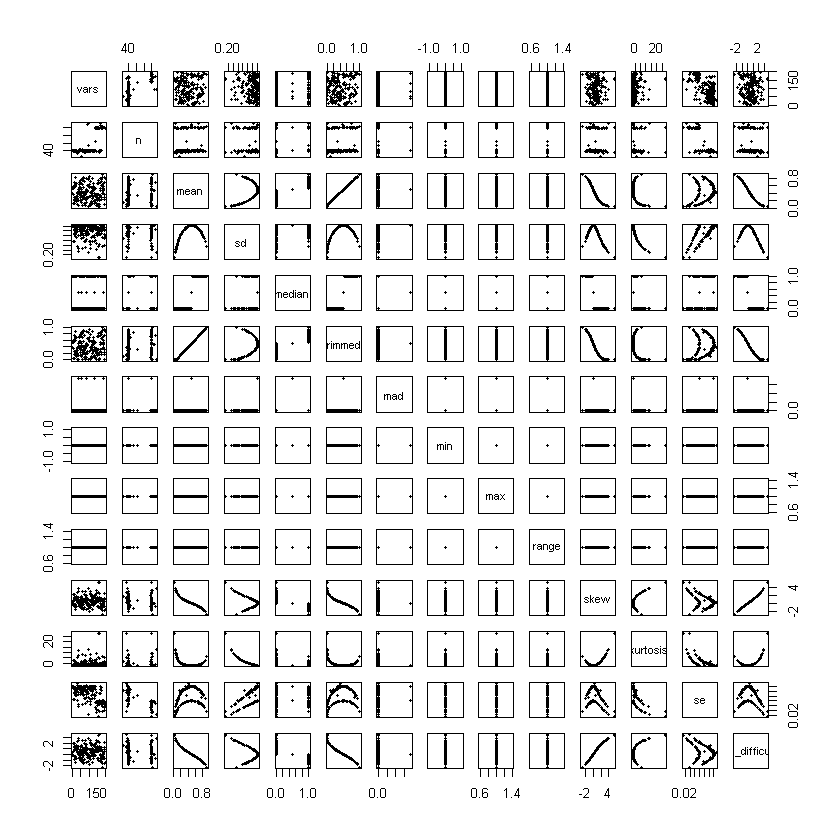

In [6]:
pairs(califs_complete_desc,pch=16, cex=.5)


[1] 565 195

,EM_16b,EM_21a,EM_21b,EM_26,EM_27b,EM_35,EM_43b,EM_45b,EM_45c,EM_46,...,WA_29,WA_30b,WA_31,WA_32b,WA_33b,WA_50b,WA_51,WA_52a,WA_52b,WA_7b
101.1,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
102.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
103.1,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
104.1,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
105.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
106.1,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


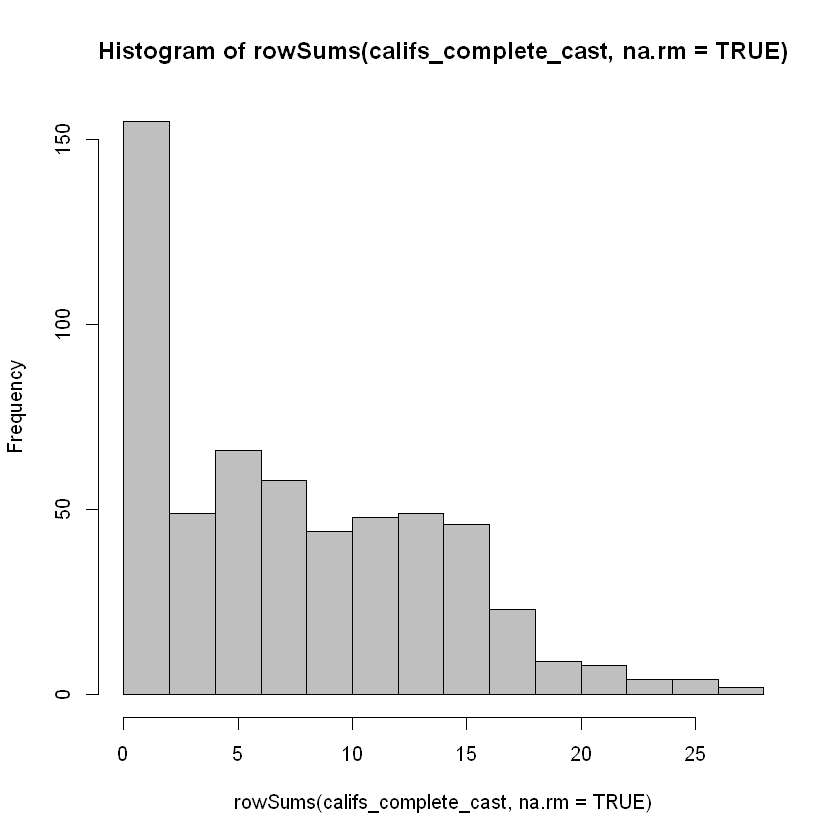

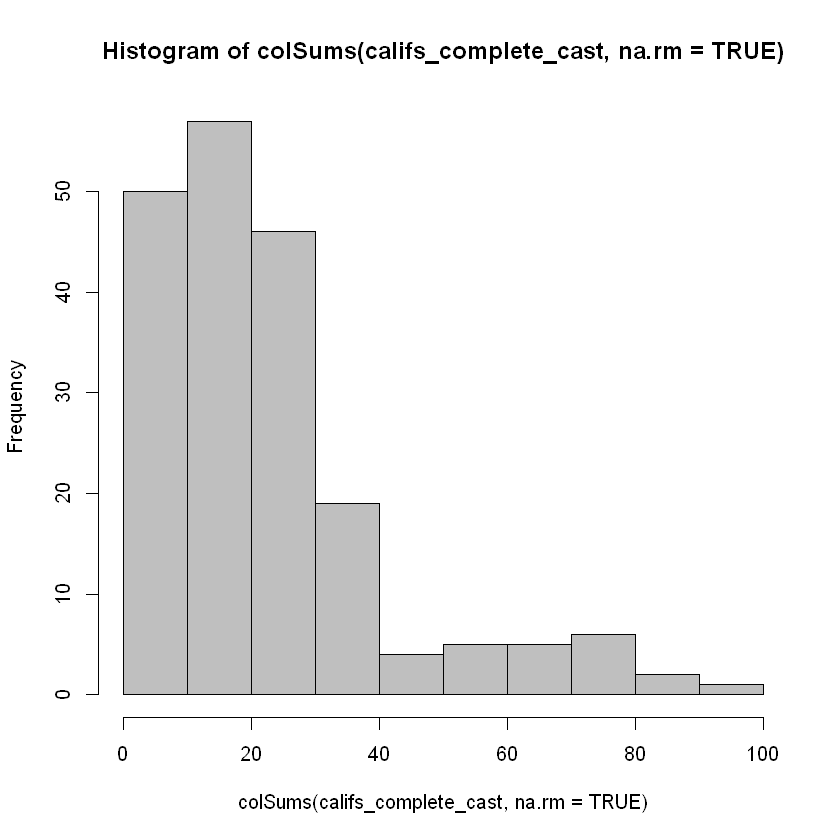

In [3]:
califs_complete_cast=read.csv("califs_complete_cast.csv", header=TRUE, row.names=1)

dim(califs_complete_cast)
head(califs_complete_cast)

hist(rowSums(califs_complete_cast,na.rm=TRUE), col="gray75")
# table(rowSums(califs_complete_cast,na.rm=TRUE))

hist(colSums(califs_complete_cast,na.rm=TRUE), col="gray75")
# table(colSums(califs_complete_cast,na.rm=TRUE))

# rowSums(!is.na(califs_complete_cast))
# colSums(!is.na(califs_complete_cast))


# Infit y Outfit 
https://rdrr.io/rforge/eRm/man/itemfit.ppar.html

https://rdrr.io/rforge/eRm/man/RM.html

https://cran.r-project.org/web/packages/eRm/index.html

https://www.rasch.org/rmt/rmt162f.htm

https://www.rasch.org/rmt/rmt82a.htm


In [3]:
# Rasch model, estimation of item and person parameters
res <- RM(califs_complete_cast)#raschdat2#califs_complete_cast
p.res <- person.parameter(res)

# Matrix with expected probabilities and corresponding residuals
# pmat(p.res)
# residuals(p.res)

#Itemfit
itemfit(p.res)

#Personfit
# personfit(p.res)

Spline interpolation in some subgroups not performed!
  Less than 4 different person parameters estimable!
  Perhaps NAs in subgroup(s).



Itemfit Statistics: 
          Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t
EM_16b   34.060  39   0.694      0.852     0.920    -0.73   -0.70
EM_21a   37.380  39   0.544      0.934     0.955    -0.52   -0.41
EM_21b   45.444  39   0.221      1.136     1.102     1.02    0.89
EM_26    46.861  38   0.153      1.202     1.140     1.50    1.36
EM_27b   37.015  39   0.561      0.925     0.919    -0.36   -0.71
EM_35    39.715  39   0.438      0.993     1.000    -0.03    0.03
EM_43b   41.039  39   0.381      1.026     1.061     0.24    0.61
EM_45b   41.049  39   0.381      1.026     1.031     0.31    0.41
EM_45c  155.983  38   0.000      4.000     0.940     3.57   -0.08
EM_46    31.173  39   0.810      0.779     0.877    -0.80   -0.59
EM_47    42.278  38   0.291      1.084     1.063     0.46    0.44
EM_48b   56.730  39   0.033      1.418     1.087     0.94    0.37
FN_17a   48.743  39   0.136      1.219     1.159     1.11    1.12
FN_17c   24.631  36   0.924      0.666     0.775    -1

In [4]:
it_fit=itemfit(p.res)

In [5]:
infit_tab=data.frame(
    "Chisq"=it_fit$i.fit,
    "df"=it_fit$i.df-1,
    "p_value"= pchisq(it_fit$i.fit,it_fit$i.df-1,lower.tail=FALSE),
    "outfitMSQ"=it_fit$i.outfitMSQ,
    "infitMSQ"=it_fit$i.infitMSQ,
    "outfitZ"=it_fit$i.outfitZ,
    "infitZ"=it_fit$i.infitZ
)


In [11]:
infit_tab

,Chisq,df,p_value,outfitMSQ,infitMSQ,outfitZ,infitZ
EM_16b,34.06026,39,0.6944286945819548861891,0.8515066,0.9203612,-0.73028071,-0.69920601
EM_21a,37.37991,39,0.5438760737339566331272,0.9344977,0.9546570,-0.52140890,-0.40619175
EM_21b,45.44415,39,0.2213808138787946300230,1.1361038,1.1019038,1.02104750,0.89221697
EM_26,46.86093,38,0.1534224282854614873628,1.2015624,1.1403101,1.49943812,1.35592025
EM_27b,37.01527,39,0.5607049758461210009486,0.9253817,0.9191514,-0.35571425,-0.71188988
EM_35,39.71537,39,0.4380278232468595711602,0.9928842,0.9999093,-0.02988887,0.02908896
EM_43b,41.03940,39,0.3812251670519943846926,1.0259851,1.0613899,0.23915624,0.60566064
EM_45b,41.04927,39,0.3808142232876991495338,1.0262318,1.0314509,0.30597333,0.41176524
EM_45c,155.98313,38,0.0000000000000003098043,3.9995676,0.9398529,3.56535269,-0.08267248
EM_46,31.17324,39,0.8096635466095686295418,0.7793310,0.8773960,-0.79719702,-0.58731792


In [6]:
write.csv(infit_tab,"output_infit.csv")

In [10]:
write.csv(data.frame(it_fit$st.res), "residuals_calif_cast.csv")

In [8]:
save(it_fit, file = "it_fit.rda")

### Import ouptuputs data
1. Avoid redo infit matrix (about 3 hours of calculations)
2. Clear memory to avoid saturate it

In [26]:
load(file = "it_fit.rda")
infit_tab=read.csv("output_infit.csv",row.names=1)
califs_complete_desc=read.csv("califs_complete_desc.csv",row.names=1)

In [28]:
califs_complete_desc=califs_complete_desc[c("n",
                                            "mean",
                                            "sd",
                                            "median",
                                            "trimmed",
                                            "range",
                                            "skew",
                                            "kurtosis",
                                            "se",
                                            "IRT_difficulty")]

In [30]:
irt_desc=cbind(califs_complete_desc,infit_tab)

In [32]:
write.csv(irt_desc, "irt_desc.csv")

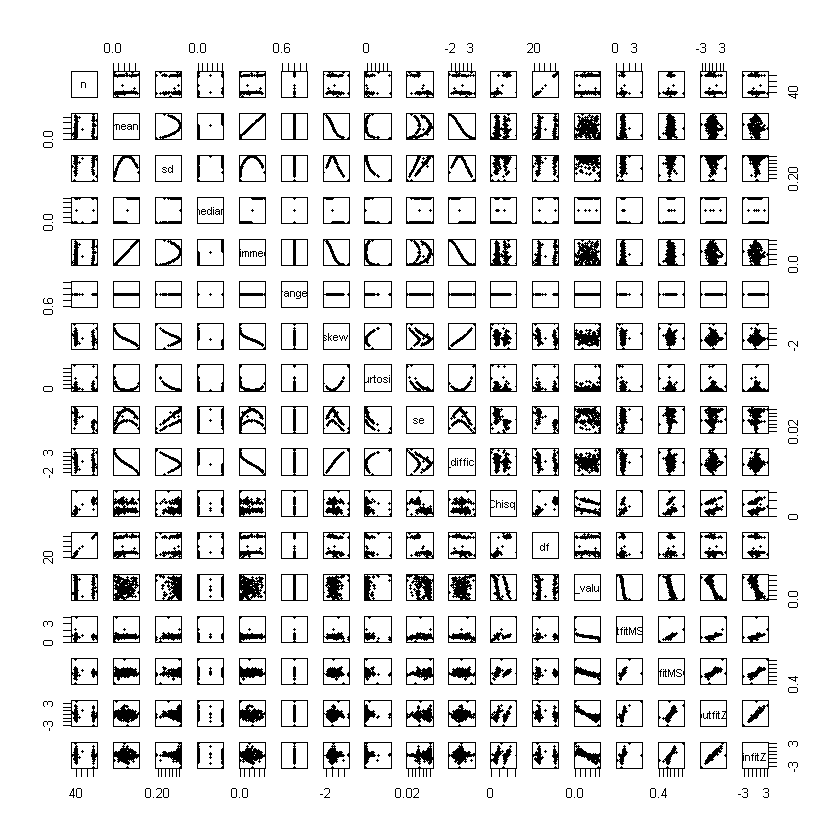

In [34]:
pairs(irt_desc, pch=16, cex=.5)